In [1]:
import nicepy as npy
from nicepy import u as u
from scipy import integrate
from nicepy import beam
from scipy import special
import matplotlib.ticker as tck

# from basic_units import radians, degrees, cos

%matplotlib inline

In [11]:
def collision_energy(m1, m2, v1, v2):
    mu = m1*m2/(m1+m2)
    v_com = (m1*v1+m2*v2)/(m1+m2)
    
    output = 0.5*mu*v_com**2
    
    return output

## Arrhenius

Used for values found on UMIST 12

\begin{equation}
k= \alpha \left(\frac{T}{300}\right)^\beta e^{-\frac{\gamma}{T}}
\end{equation}

In [5]:
def arrhenius(temp, alpha, beta, gamma):
    output = alpha * (temp/300)**beta * np.exp(-gamma/temp)
    return output

In [7]:
# HCO+ + H2O -> H3O
alpha = 2.5e-9
beta = -0.5
gamma = 0
arrhenius(7, alpha, beta, gamma)

1.636634176769943e-08

In [23]:
eng = collision_energy(18*u.amu, 29*u.amu, 200*u.m/u.s, 0*u.m/u.s)
t = 2*eng/u.k
t.to(u.K)

<Quantity(7.836961874329976, 'kelvin')>

# Dipole

The main write-up is in an Overleaf file

Parameterized equation:

\begin{align}
    k_{ADO} = & \frac{2 \pi e}{\sqrt{\mu}}\left(\sqrt{\alpha}+C \mu_D\sqrt{\frac{2}{\pi k_B T}}\right)
\end{align}

In [16]:
def A(phi):
    a = 0.5
    top = a**2 * np.cos(phi)**2
    bot = np.sqrt(1 - a**2 * np.sin(phi)**2)
    
    return top/bot

def theta1(K):
    a = integrate.quad(A, 0, np.pi/2)[0]
    top = 2 * np.sqrt(2) * a
    bot = np.sqrt(1 - np.cos(K))
    
    output = top/bot
    
    return np.array(output)

class theta2:
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def top(self, theta):
        top = theta * np.sin(theta)
        bot = np.sqrt(self.alpha + np.cos(theta))

        output = top/bot

        return output

    def bot(self, theta):
        top = np.sin(theta)
        bot = np.sqrt(self.alpha + np.cos(theta))

        output = top/bot

        return output

def theta2_E(alpha):
    output = []
    for a in alpha:
        t2 = theta2(a)
        top = integrate.quad(t2.top, 0, np.pi)[0]
        bot = integrate.quad(t2.bot, 0, np.pi)[0]
        output.append(top/bot)
    
    return np.array(output)

No handles with labels found to put in legend.


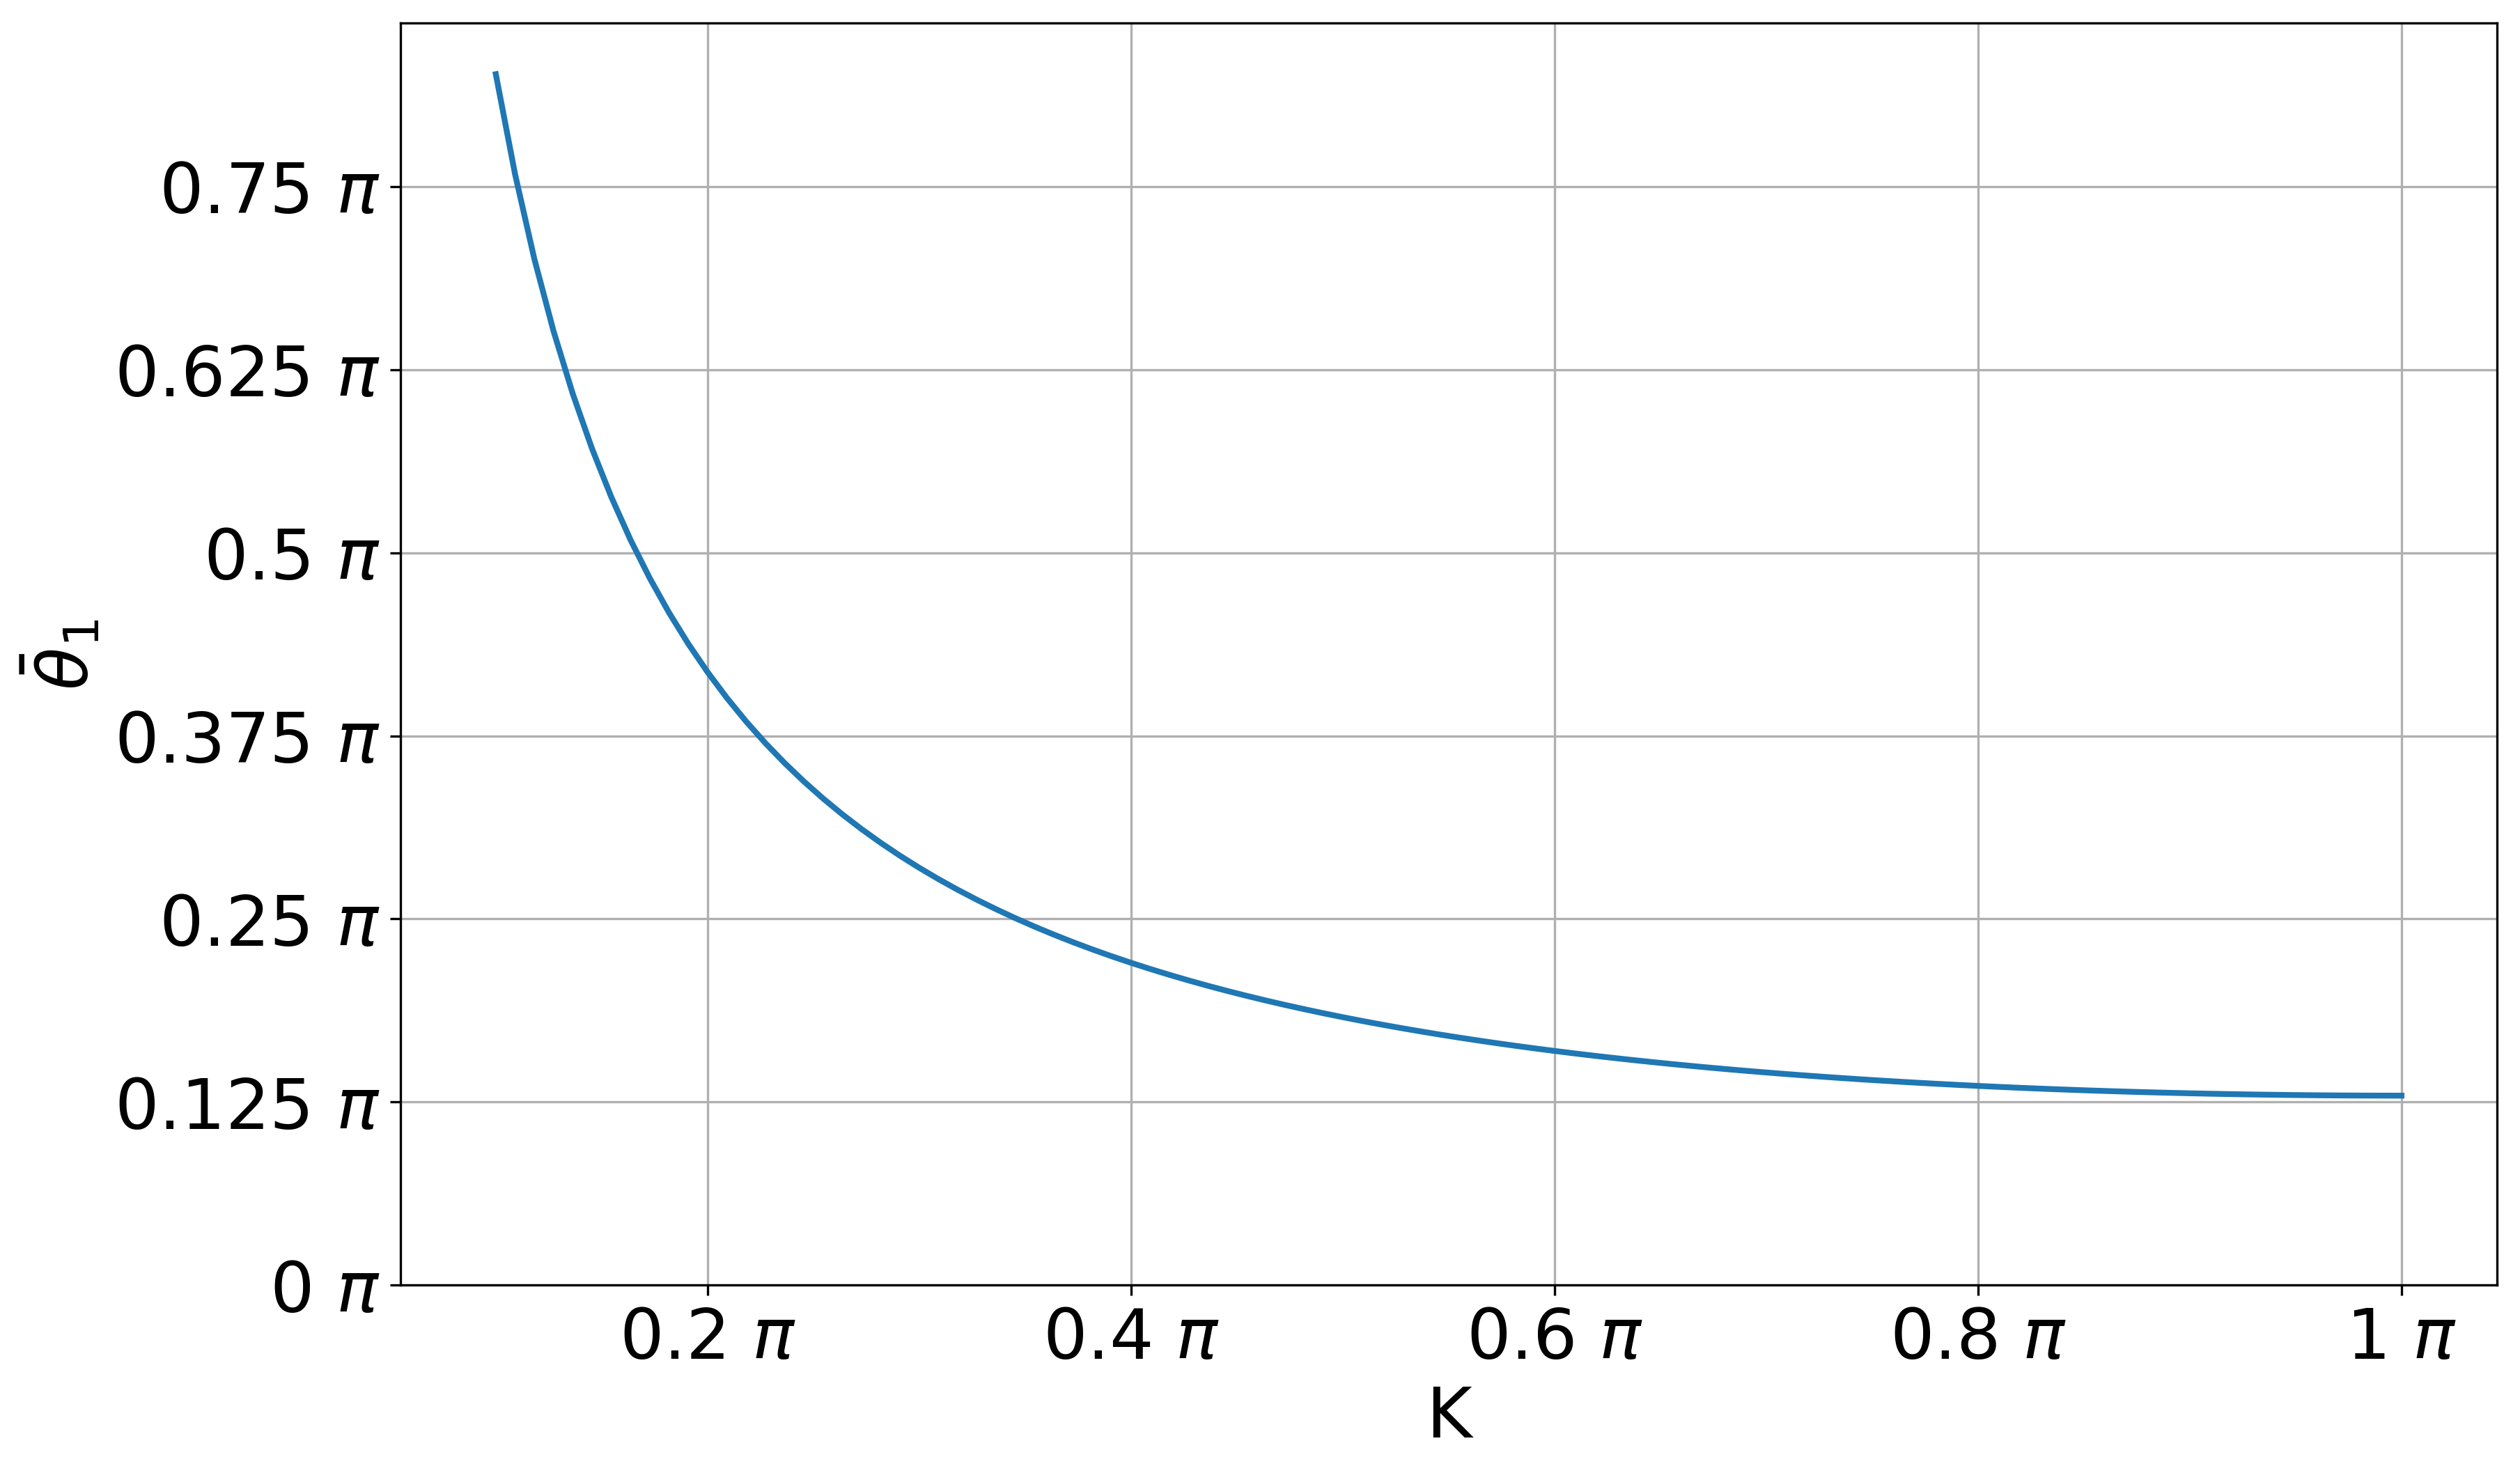

In [18]:
x = np.linspace(np.pi/10, np.pi, 100)

fig, ax = plt.subplots()

ax.plot(x/np.pi, theta1(x)/np.pi)

ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.2))

ax.set_ylabel('$\\bar{\\theta}_1$')
ax.set_xlabel('K')
ax.set_ylim(0)
# ax.text(0.5, 0.66, '$\\bar{\\theta}_1 = \\frac{2 \sqrt{2}A}{\sqrt{1-\cos(K)}}$', fontsize=36, transform=ax.transAxes)

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid(True)

In [5]:
eq = '$\\bar{\\theta}_2 = \\frac{\\int_0^\\pi \\frac{\\theta \\sin(\\theta) d\\theta}{\\sqrt{E_2/(q \\mu_D/r^2) + \\cos(\\theta)}}}{\int_0^\pi \\frac{\\sin(\\theta) d \\theta}{\\sqrt{E_2/(q \\mu_D/r^2) + \\cos(\\theta)}}}$'

No handles with labels found to put in legend.


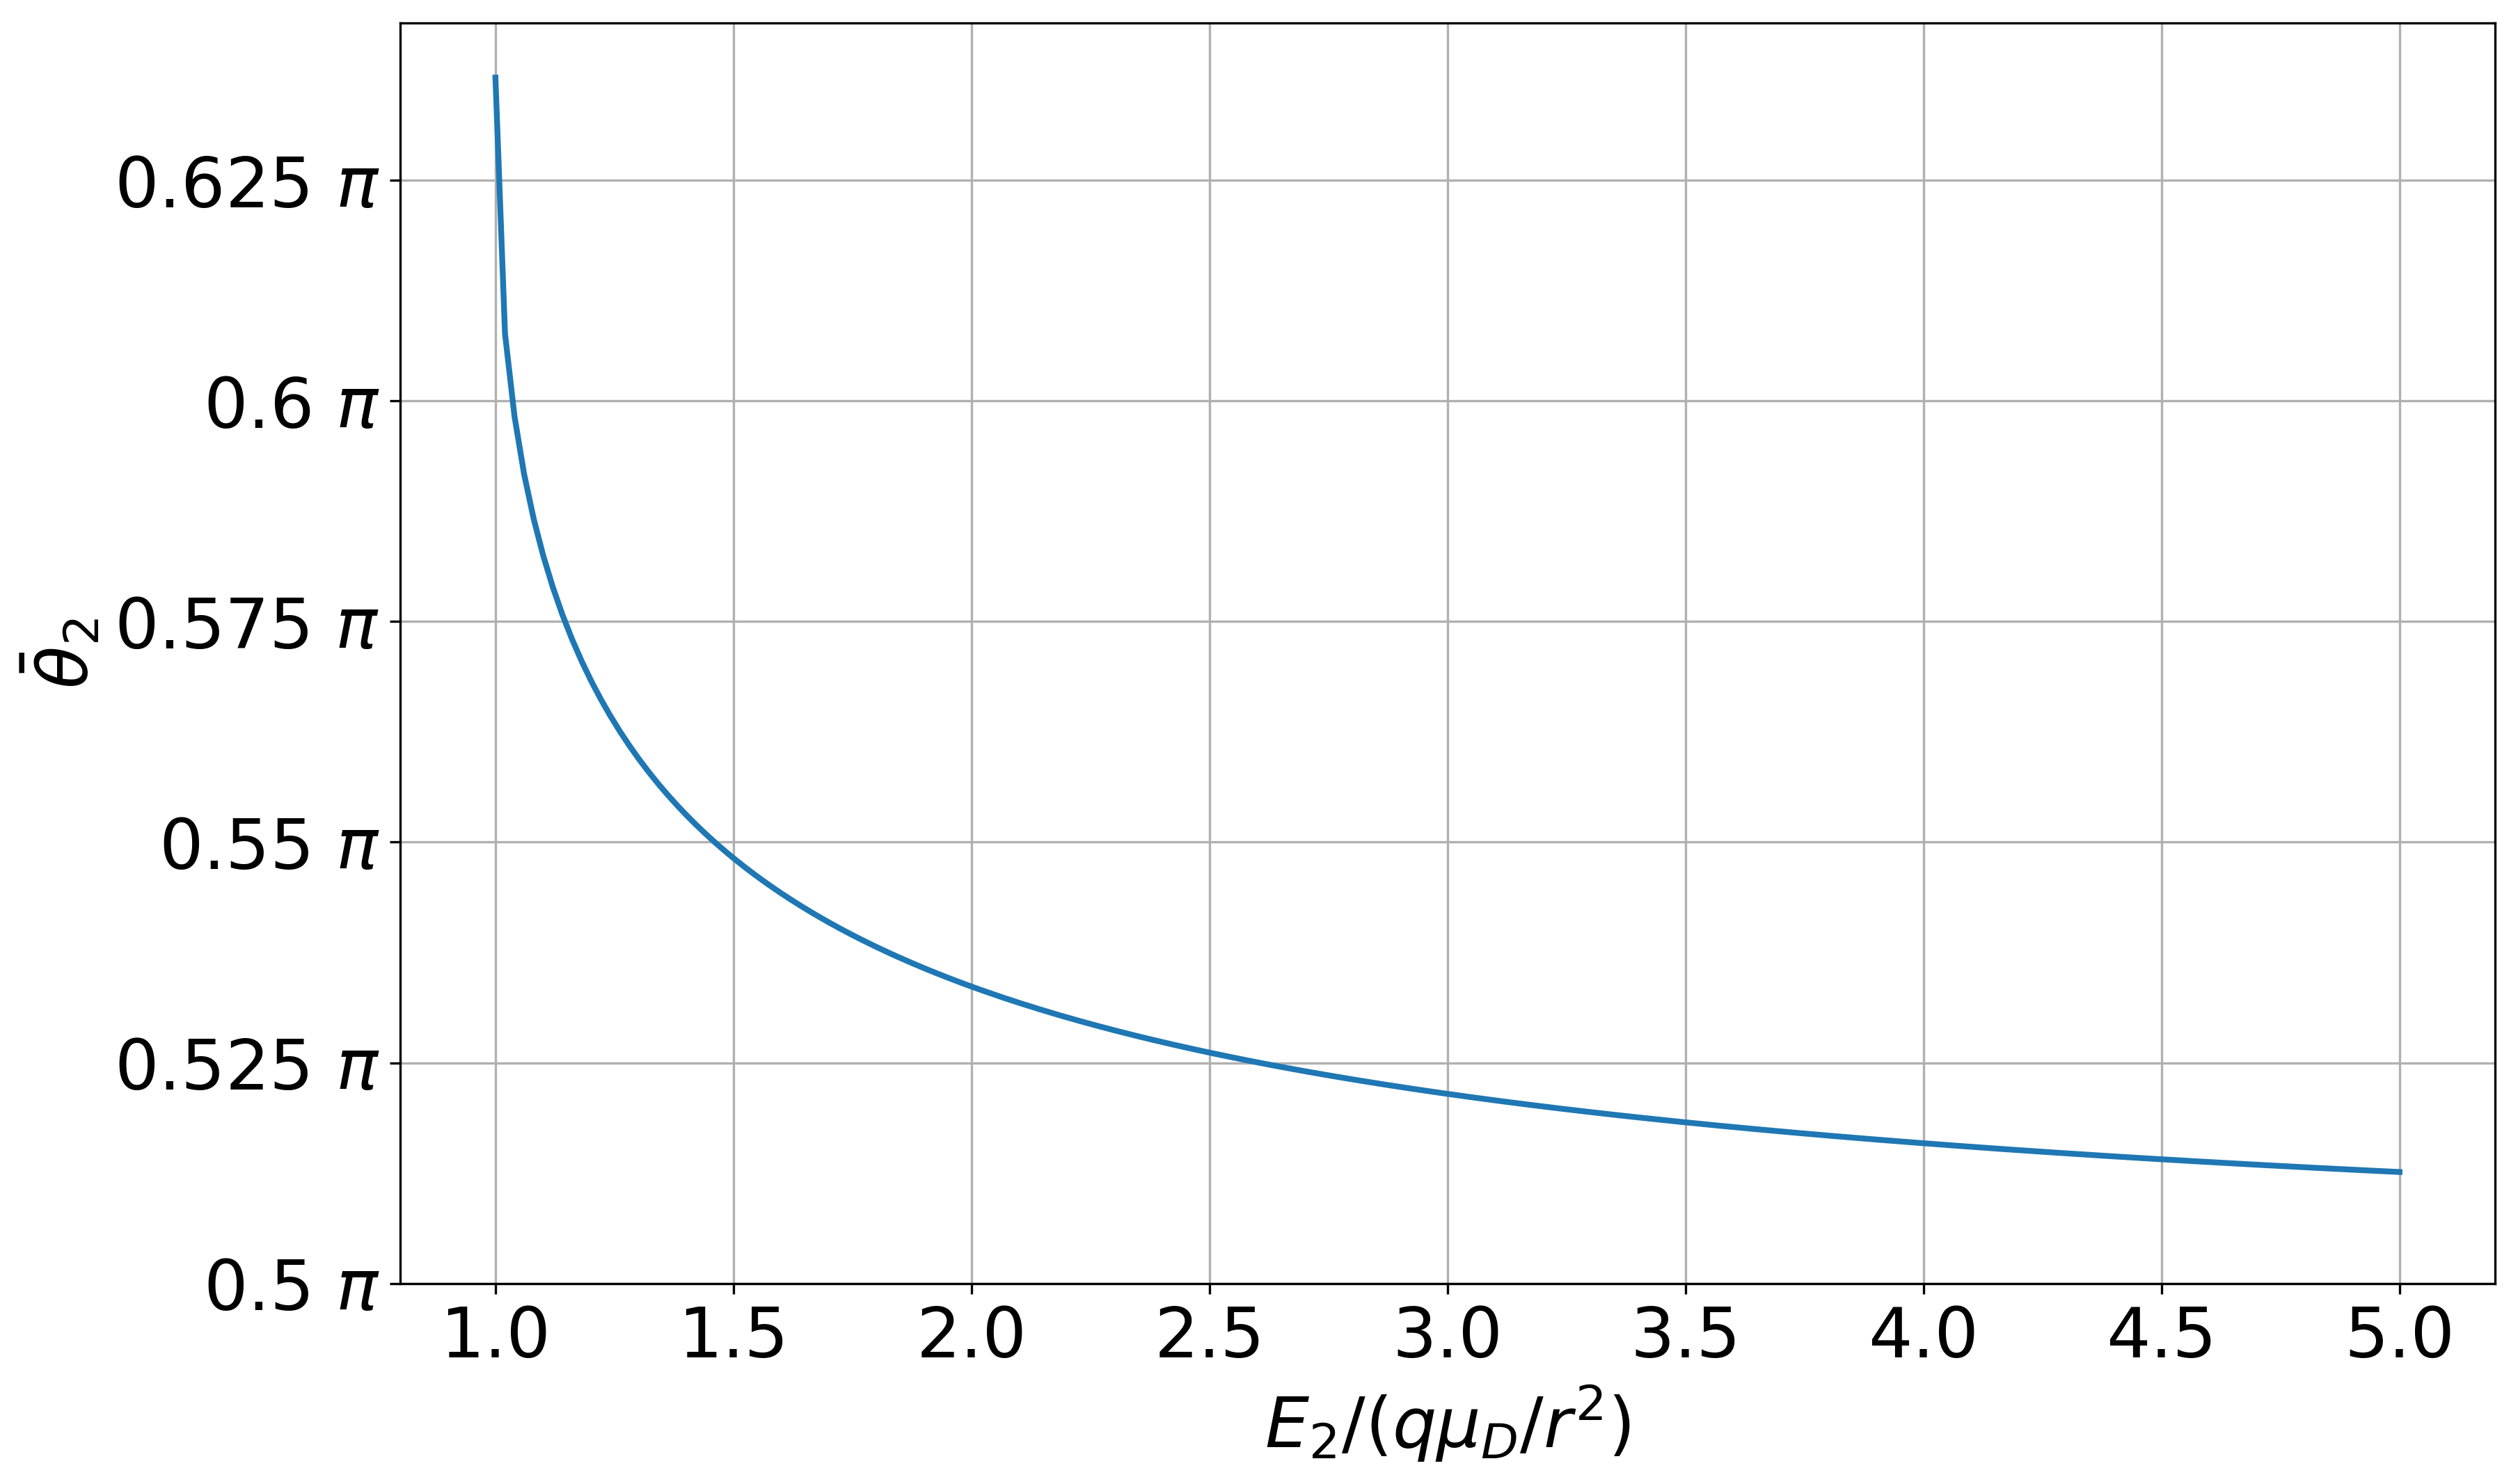

In [41]:
x = np.linspace(1, 5, 200)

fig, ax = plt.subplots()

ax.plot(x, theta2_E(x)/np.pi)

ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.025))

ax.set_ylabel('$\\bar{\\theta}_2$')
ax.set_xlabel('$E_2/(q \\mu_D/r^2)$')
ax.set_ylim(0.5)
# ax.text(0.5, 0.66, eq, fontsize=36, transform=ax.transAxes)

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid(True)

In [6]:
m1 = 18
m2 = 18
alpha = 1.501
k = npy.rate_constants.ado(temperature=100, alpha=alpha, mass1=m1, mass2=m2, mu_d=1.84, c=0.25)

print('%.02e' %(k))

3.39e-09


In [6]:
# C^+ + H2O
m1 = 12
m2 = 18
alpha = 1.501
k = npy.rate_constants.ado(temperature=20, alpha=alpha, mass1=m1, mass2=m2, mu_d=1.84, c=0.25)

print('%.02e' %(k))

6.52e-09


In [8]:
# D_2 + HCO^+
k = npy.rate_constants.langevin(1.63, 29, 40)
p = 1.7e9

print((k*p))

1.238896050790369


In [9]:
# O_2 + HCO^+
k = npy.rate_constants.langevin(1.562, 32, 29)
p = 1.768e8

print(1/(k*p))

7.54205510054362


In [3]:
# H_2O + Be^+
m1 = 9
m2 = 18
alpha = 1.501
k = npy.rate_constants.ado(temperature=20, alpha=alpha, mass1=m1, mass2=m2, mu_d=1.84, c=0.25)

print('%.02e' %(k))

6.62e-09


# Quadrupole
This works for the quadrupole moment as well:

$$U_{ij} = \frac{3}{2}\frac{\mu_i Q_j}{r_{ij}^4} (\cos\theta_i-\cos\theta_j)(1+5\cos\theta_i\cos\theta_j-2\cos\gamma_{ij}) $$

where $\gamma_{ij} \equiv \cos\theta_i\cos\theta_j + \sin\theta_i\sin\theta_j\cos\phi_{ij}$

Simplified form from Willitch's Cold Ion Chemistry:

\begin{align}
    k(T) = 4\sqrt{\frac{\pi}{3 \mu_R}} \Gamma\left(\frac{1}{3}\right) C_3^{2/3} (k_B T)^{-1/6}
\end{align}

Where $C_3 = \frac{1}{2} Q(3 \cos(\theta)^2 - 1)$

Another form from Kosmas gives:

\begin{align}
    k(T) & = k_L \left(1+0.0146 \frac{Q^2}{(kT)^{1/2} q \alpha^{3/2}}\right)
\end{align}

In [4]:
def k_quadrupole(temperature, mass1, mass2, Q, alpha):
    
    _e = 4.8e-10  # CGS elementary charge
    _kb = 1.38e-16  # CGS boltzmann constant
    kL = npy.rate_constants.langevin(alpha=alpha, mass1=mass1, mass2=mass2)
    
    Q = Q * 1e-18 * 1e-8
    alpha = alpha * 1e-24
    
    top = Q**2
    bot = (_kb * temperature)**0.5 * _e * alpha**1.5
    
    output = kL * (1 + 0.0146 * top/bot)
    
    return output

In [4]:
import scipy.special

In [56]:
def k_dd(temperature, mass1, mass2, mu1, mu2, angle):
    _e = 4.8e-10  # CGS elementary charge
    _kb = 1.38e-16  # CGS boltzmann constant
    mu = npy.rate_constants.reduced_mass(mass1=mass1, mass2=mass2)*u.amu
    mu = mu.to(u.g).magnitude
    a = 4*np.sqrt(np.pi/(3*mu))*2.6789*(_kb*temperature)**(-1/6)
    c3 = mu1*1e-18*mu2*1e-18*np.cos(angle*np.pi/180)
    
    return a*(c3)**(2/3)

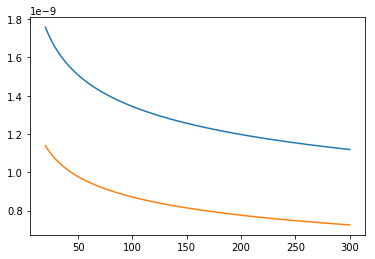

In [60]:
temp = np.linspace(20, 300, 100)
angle = 60

fig, ax = plt.subplots()
ax.plot(temp, k_dd(temp, 18, 29, 1.8, 4.6, angle=angle))
ax.plot(temp, k_dd(temp, 18, 29, 1.8, 2.4, angle=angle))

In [67]:
k_dd(20, 18, 29, 1.84, 4.6, angle=0) + npy.rate_constants.ado(20, 18, 29, 1.84, 0.25, 1.501)

7.985855327392822e-09

In [61]:
k_quadrupole(100, 18, 29, )

5.154340166763338e-09

In [48]:
print('%.02e' %k_quadrupole(100, 29, 30, 1.4, 1.71))

8.15e-10


In [5]:
npy.rate_constants.langevin(alpha=1.71, mass1=29, mass2=30)

7.970049687669697e-10

In [25]:
npy.rate_constants.ado(6, 18, 29, 1.84, 0.25, 1.501)

8.700025946206046e-09

In [3]:
npy.rate_constants.ado(100, 18, 9, 1.84, 0.25, 1.501)

4.617666299924901e-09

## C$^+$ + H$_2$O

Comparison of ADO and Langevin rates calculated for C$^+$ + H$_2$O reaction

H$_2$O values, $\alpha=1.501$, $\mu_D = 1.84$, $C=0.25$.

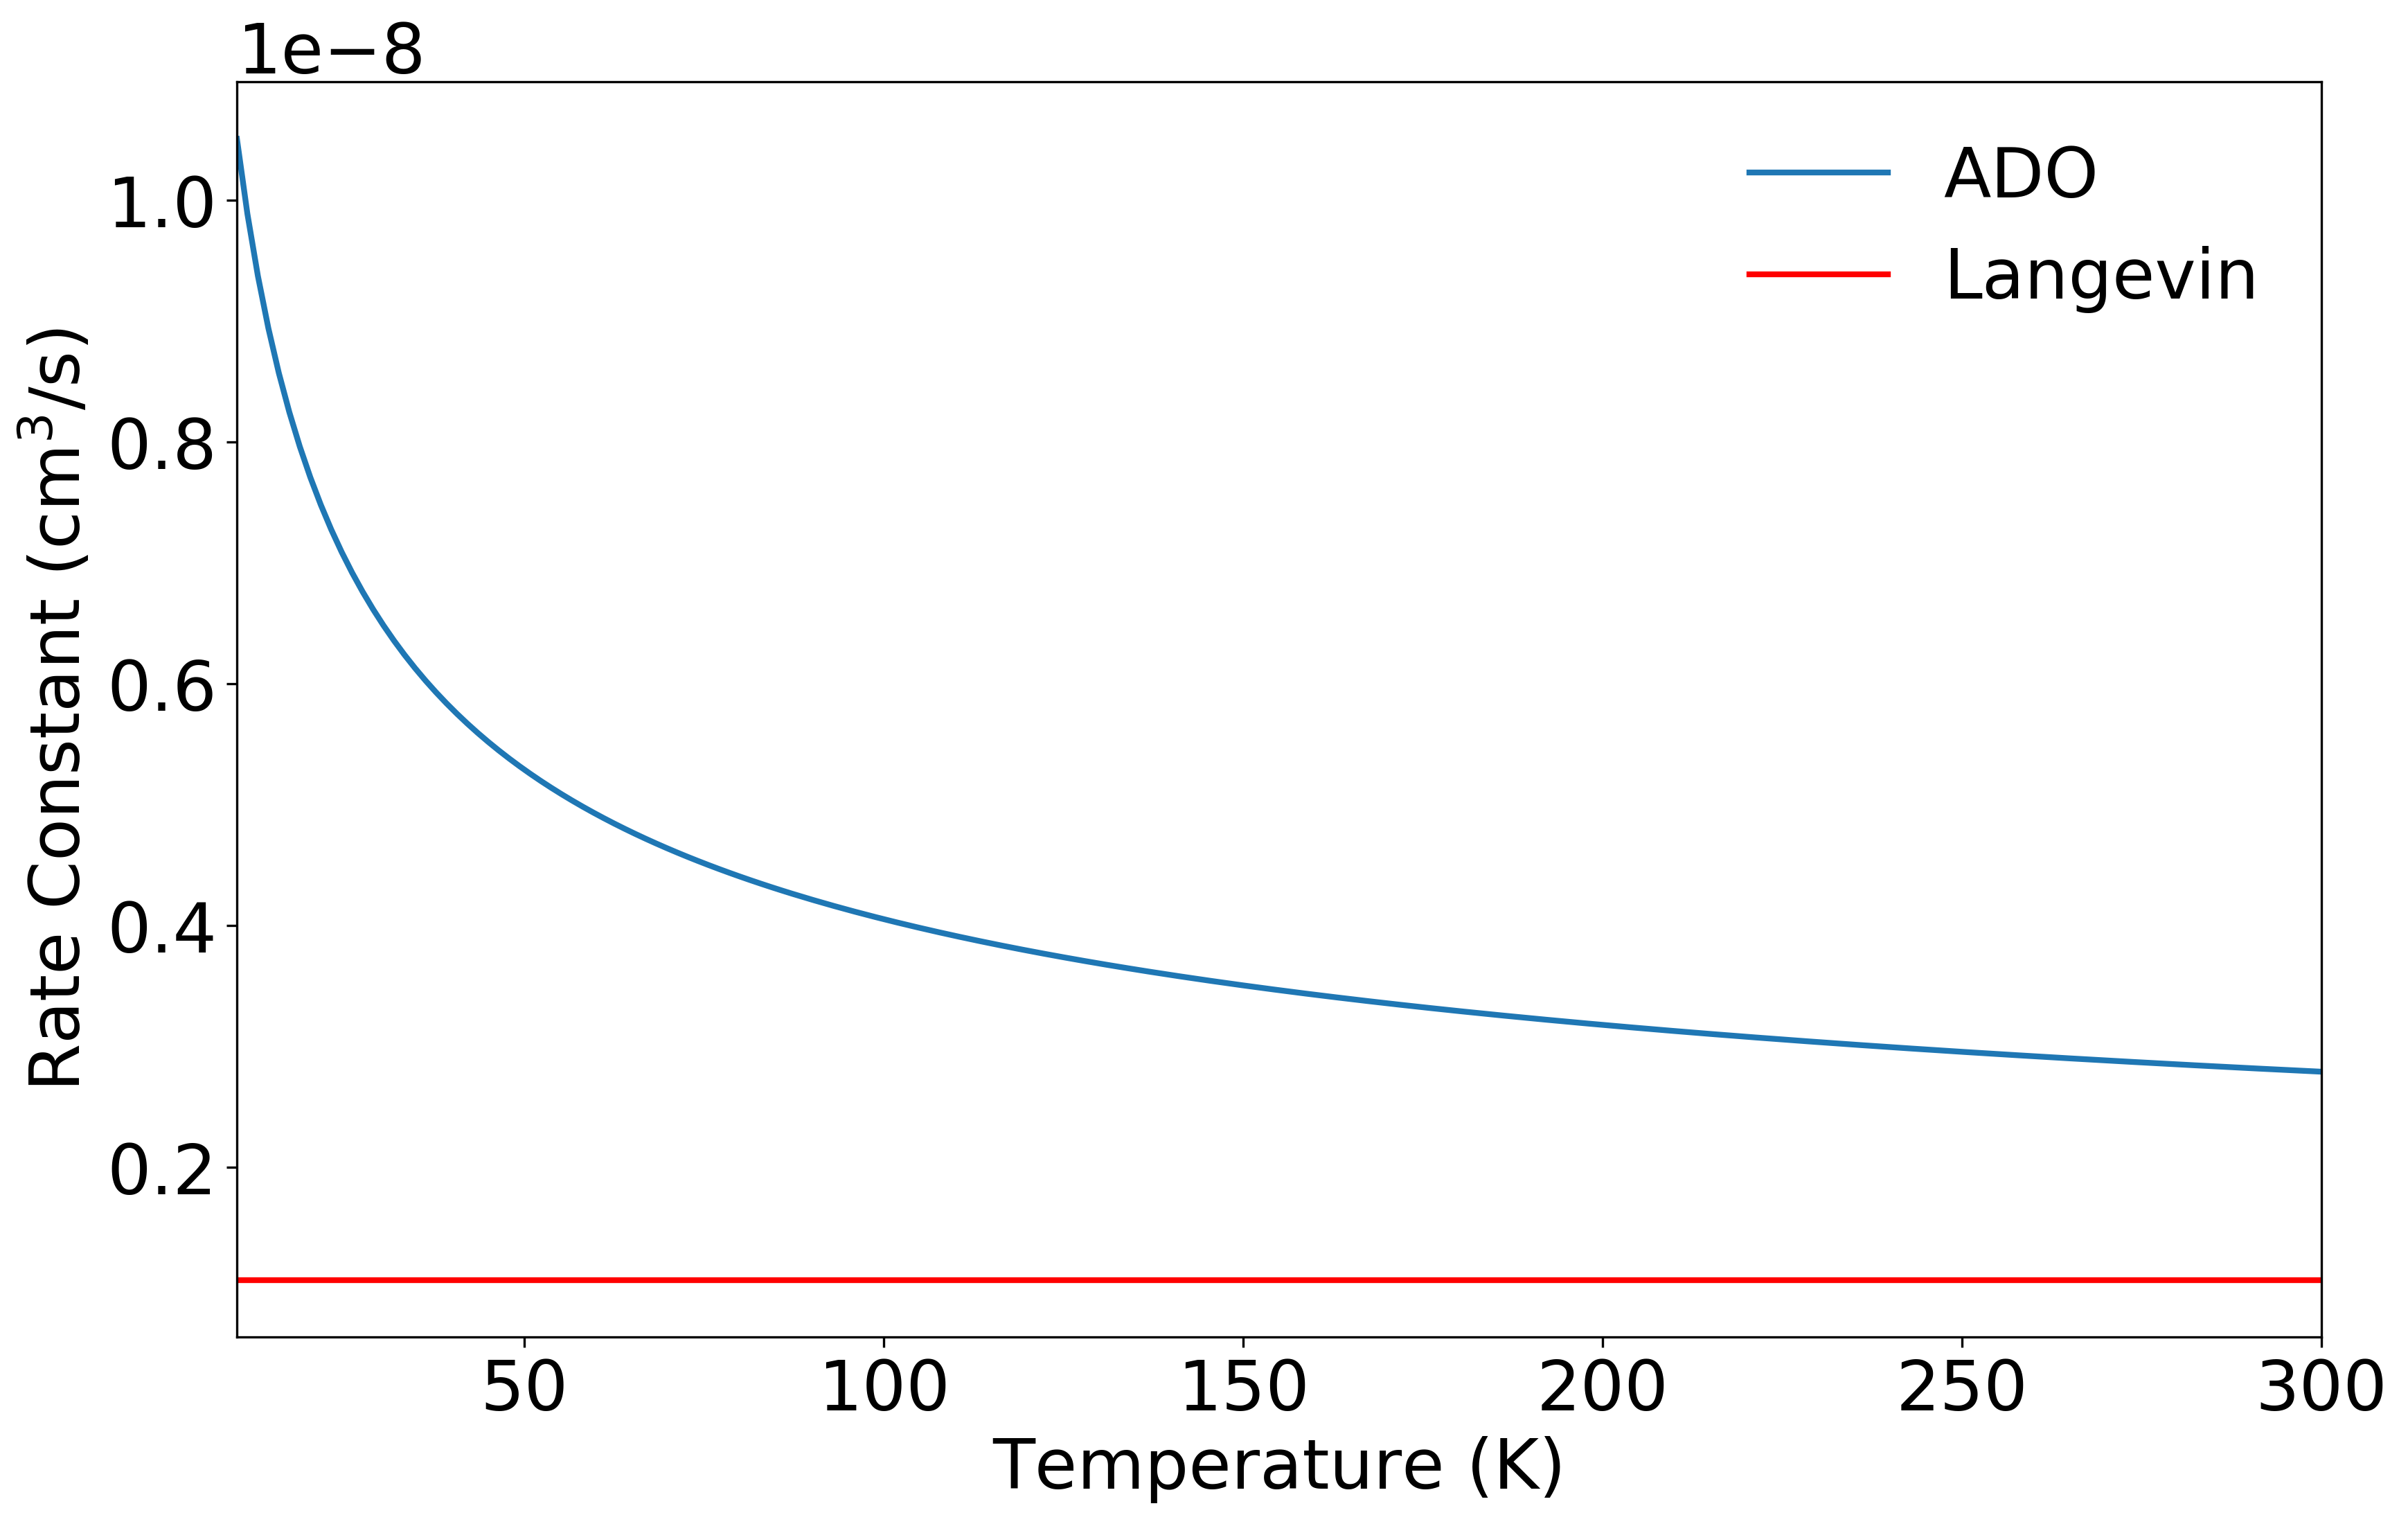

In [9]:
temp = np.linspace(10, 300, 200)
fig, ax = plt.subplots()
ax.plot(temp, npy.rate_constants.ado(temp, 18, 12, 1.84, 0.25, 1.501), label='ADO')
ax.axhline(npy.rate_constants.langevin(alpha=1.501, mass1=18, mass2=12), color='r', label='Langevin')
ax.set_xlim(10, 300)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Rate Constant (cm$^3$/s)')

npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('ADO_Langevin_compare.png', bbox_inches='tight')